<a href="https://colab.research.google.com/github/vlad-pirvu/PyTorch_Learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [ ]:
import torch
from torch import nn # nn contanins all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data (preparing and loading)

Data can be almost anything in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio (songs, podcasts, recordings etc)
* DNA

Machine learning has 2 parts:
* Numerically encode (convert) your data
* Build & use a model to learn patterns in your numbers

We'll use a linear regression formula to make a straight line with *known* **parameters**

Linear Regression: Y = a + bX   

a - intercept / bias

b - slope / weight


In [ ]:
#Create *known* parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

###Splitting data into training and test sets (one of the most important concepts in machine learning in general)

80% - 20%

In [ ]:
#Create a test/train split
train_split = int(0.8*len(X))  #40
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(X_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10,7))
  #plot training data in blue:
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  #plot test data in blue:
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
  #are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #show the legend
  plt.legend(prop={"size":14})

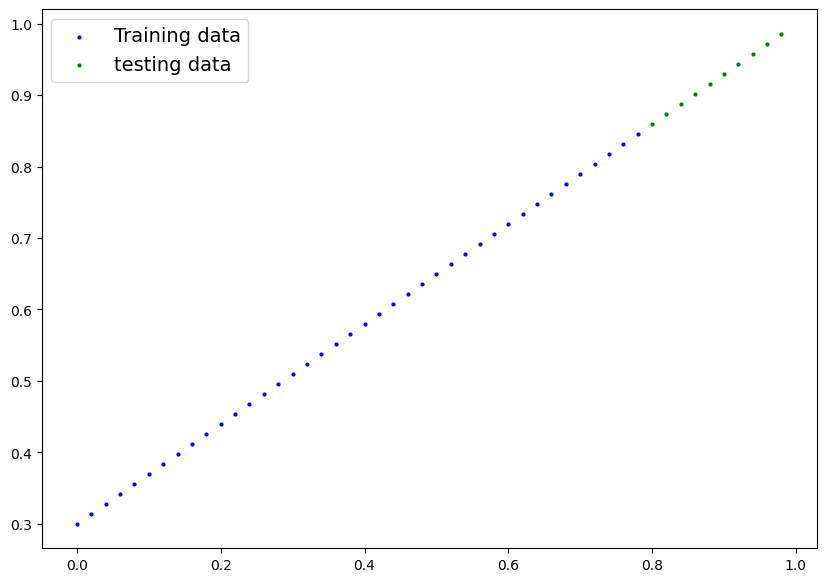

In [ ]:
plot_predictions()

## 2. Building a model

What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

It does this through 2 main algorithms:
1. Gradient descent
2. Backpropagation

In [ ]:
# Create linear regression model class

from torch import nn

# almost everything in PyTorch inherits nn.module - you must inherit it when creating your own model

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  #Forward method to define the computation in the model:
  def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias #linear regression formula


###Pytorch model building essentials

* torch.nn - contains all the building blocks for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try to learn - often a PyTorch layer from torch.nn will set this for us
* torch.nn.Module - the base class for all neural network modules - if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient decent
* def forward() - All nn.Module subclasses requires you to define forward() - this method defines what happens in the forward computation


### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

We can check our model parameters (what's inside our model) using `.parameters()`



In [ ]:
#Create a random seed
torch.manual_seed(42)

#Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method

In [ ]:
from torch.nn.modules.container import ModuleList
# Make predictions with the model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

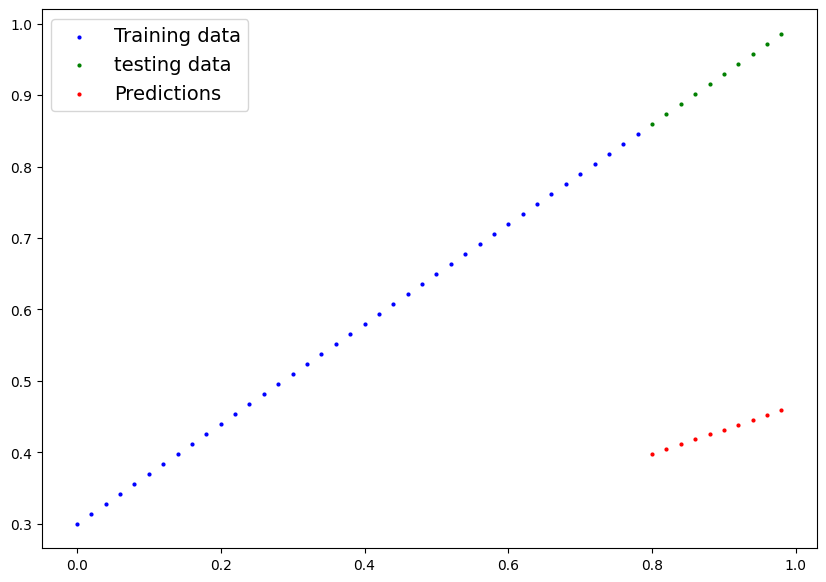

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
#5:41:15 - training a model